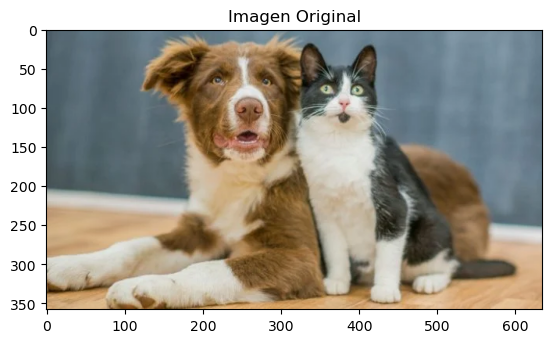

In [65]:
import cv2
from matplotlib import pyplot as plt

# Leer la imagen
img = cv2.imread('imagen.png')

# Mostrar la imagen original
plt.imshow(pic_arr)
plt.title("Imagen Original")
plt.show()

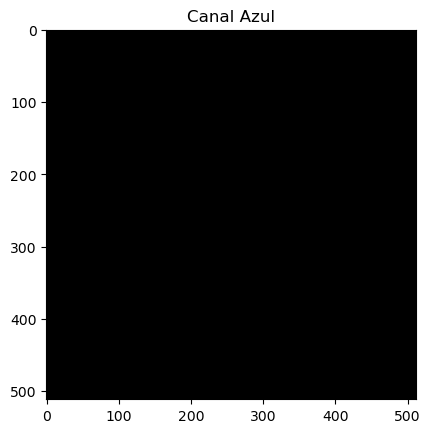

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


In [62]:
# Mostrar solo el canal azul
blue_channel = img.copy()
blue_channel[:, :, 1] = 0  # Eliminar el canal verde
blue_channel[:, :, 2] = 0  # Eliminar el canal rojo

plt.imshow(cv2.cvtColor(blue_channel, cv2.COLOR_BGR2RGB))
plt.title("Canal Azul")
plt.show()

print(blue_channel[0])


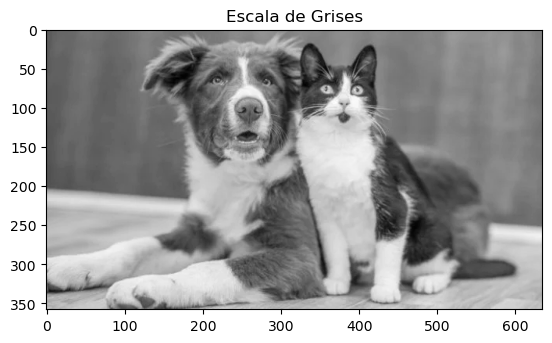

In [12]:
# Convertir la imagen a escala de grises
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img, cmap='gray')
plt.title("Escala de Grises")
plt.show()

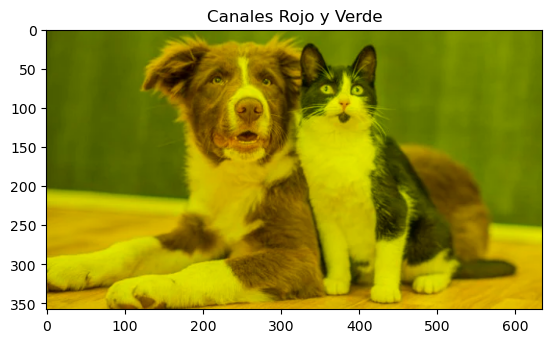

In [13]:
# Crear una nueva imagen con solo los canales rojo y verde
rg_img = img.copy()
rg_img[:, :, 0] = 0  # Eliminar el canal azul

plt.imshow(cv2.cvtColor(rg_img, cv2.COLOR_BGR2RGB))
plt.title("Canales Rojo y Verde")
plt.show()

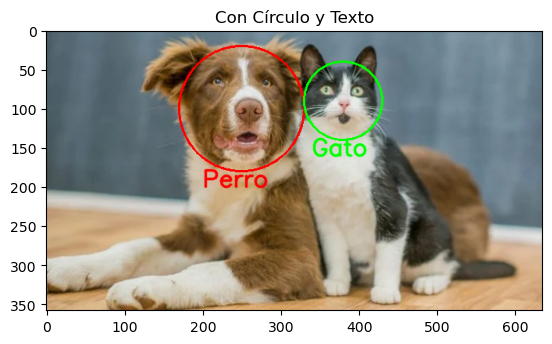

True

In [34]:

imagen = cv2.cvtColor(circle_img, cv2.COLOR_BGR2RGB)

# Dibujar un círculo y agregar texto (suponiendo que la cara está en el centro de la imagen)
center_coordinates = (250, 100)
radius = 80
color = (255, 0, 0)  # Rojo
thickness = 2

# Dibujar el círculo
circle_img = img.copy()
cv2.circle(imagen, center_coordinates, radius, color, thickness)
# Agregar texto
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(imagen, 'Perro', (center_coordinates[0] - 50, center_coordinates[1] + 100), font, 1, color, 2, cv2.LINE_AA)


center_coordinates = (380,90)
radius = 50
color = (0, 255, 0)  # Azul
thickness = 2
# Dibujar el círculo
circle_img = img.copy()
cv2.circle(imagen, center_coordinates, radius, color, thickness)
# Agregar texto
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(imagen, 'Gato', (center_coordinates[0] - 40, center_coordinates[1] + 70), font, 1, color, 2, cv2.LINE_AA)


plt.imshow(imagen)
plt.title("Con Círculo y Texto")
plt.show()

# Guardar la imagen
cv2.imwrite('image_with_circle_and_text.jpg', imagen)

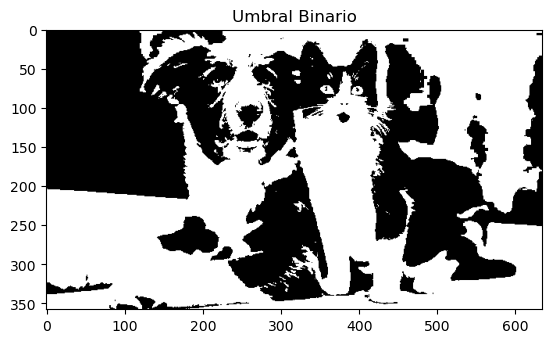

In [41]:
# Aplicar umbral binario
ret, binary_img = cv2.threshold(gray_img, 120, 255, cv2.THRESH_BINARY)

plt.imshow(binary_img, cmap='gray')
plt.title("Umbral Binario")
plt.show()

In [58]:
import cv2
import numpy as np

class ShapeDrawer:
    def __init__(self, image = np.zeros((512, 512, 3), np.uint8)):
        self.drawing = False
        self.mode = 'rectangle'
        self.ix, self.iy = -1, -1
        self.show_help = False
        self.img = image
        self.setup()

    def setup(self):
        cv2.namedWindow('image')
        cv2.setMouseCallback('image', self.draw_shape)
        self.print_instructions()
        self.main_loop()

    def print_instructions(self):
        print("Instrucciones:")
        print("Presiona 'r' para modo rectángulo")
        print("Presiona 'c' para modo círculo")
        print("Presiona 'l' para modo línea")
        print("Presiona 's' para guardar la imagen")
        print("Presiona 'q' para salir")
        print("Presiona 'h' para mostrar/ocultar ayuda")

    def draw_shape(self, event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            self.drawing = True
            self.ix, self.iy = x, y

        elif event == cv2.EVENT_MOUSEMOVE:
            if self.drawing:
                img_copy = self.img.copy()
                if self.mode == 'rectangle':
                    cv2.rectangle(img_copy, (self.ix, self.iy), (x, y), (0, 255, 0), 2)
                elif self.mode == 'circle':
                    radius = int(((x - self.ix) ** 2 + (y - self.iy) ** 2) ** 0.5)
                    cv2.circle(img_copy, (self.ix, self.iy), radius, (0, 255, 0), 2)
                elif self.mode == 'line':
                    cv2.line(img_copy, (self.ix, self.iy), (x, y), (0, 255, 0), 2)
                if self.show_help:
                    self.display_help(img_copy)
                cv2.imshow('image', img_copy)

        elif event == cv2.EVENT_LBUTTONUP:
            self.drawing = False
            if self.mode == 'rectangle':
                cv2.rectangle(self.img, (self.ix, self.iy), (x, y), (0, 255, 0), 2)
            elif self.mode == 'circle':
                radius = int(((x - self.ix) ** 2 + (y - self.iy) ** 2) ** 0.5)
                cv2.circle(self.img, (self.ix, self.iy), radius, (0, 255, 0), 2)
            elif self.mode == 'line':
                cv2.line(self.img, (self.ix, self.iy), (x, y), (0, 255, 0), 2)

    def display_help(self, image):
        instructions = [
            "Presiona 'r' para modo rectángulo",
            "Presiona 'c' para modo círculo",
            "Presiona 'l' para modo línea",
            "Presiona 's' para guardar la imagen",
            "Presiona 'q' para salir",
            "Presiona 'h' para mostrar/ocultar ayuda"
        ]
        y0, dy = 20, 20
        for i, line in enumerate(instructions):
            y = y0 + i * dy
            cv2.putText(image, line, (10, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1, cv2.LINE_AA)

    def main_loop(self):
        while True:
            img_copy = self.img.copy()
            if self.show_help:
                self.display_help(img_copy)
                
            if not self.drawing:
                cv2.imshow('image', img_copy)
            
            k = cv2.waitKey(1) & 0xFF
            if k == ord('r'):
                self.mode = 'rectangle'
            elif k == ord('c'):
                self.mode = 'circle'
            elif k == ord('l'):
                self.mode = 'line'
            elif k == ord('s'):
                cv2.imwrite('drawn_image.jpg', self.img)
                print("Imagen guardada como 'drawn_image.jpg'")
            elif k == ord('q'):
                break
            elif k == ord('h'):
                self.show_help = not self.show_help

        cv2.destroyAllWindows()


In [66]:
ShapeDrawer(img)

Instrucciones:
Presiona 'r' para modo rectángulo
Presiona 'c' para modo círculo
Presiona 'l' para modo línea
Presiona 's' para guardar la imagen
Presiona 'q' para salir
Presiona 'h' para mostrar/ocultar ayuda
Imagen guardada como 'drawn_image.jpg'
